In [17]:
import os
import argparse
from time import time
from pathlib import Path
import pandas as pd     
import numpy as np
# import plotly.figure_factory as plotly_ff
# import plotly.express as plotly_x
import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import pearsonr
import google.cloud.bigquery as dw


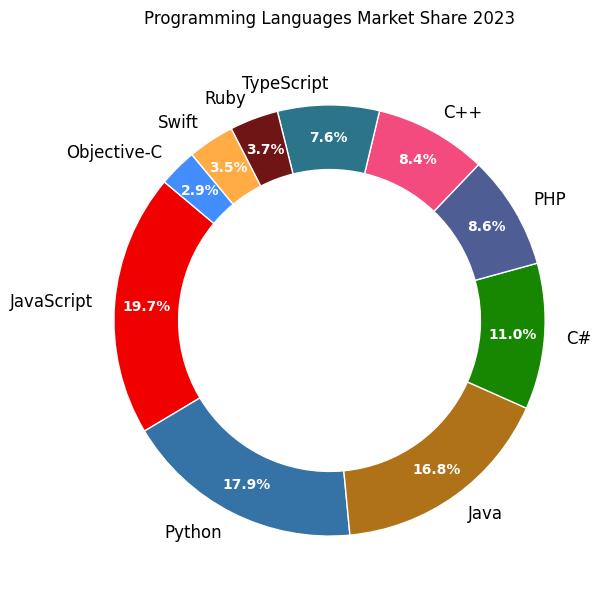

In [15]:

# Define the programming languages and their market shares
languages = [
    "JavaScript", 
    "Python", 
    "Java", 
    "C#", 
    "PHP", 
    "C++", 
    "TypeScript", 
    "Ruby", 
    "Swift", 
    "Objective-C"
]
market_shares = [12.4, 11.3, 10.6, 6.9, 5.4, 5.3, 4.8, 2.3, 2.2, 1.8]  # Example market share values

# Define colors for the pie chart
colors = [
    "#f10000",  # JavaScript
    "#3572A5",  # Python
    "#b07219",  # Java
    "#178600",  # C#
    "#4F5D95",  # PHP
    "#f34b7d",  # C++
    "#2b7489",  # TypeScript
    "#701516",  # Ruby
    "#ffac45",  # Swift
    "#438eff"   # Objective-C
]

# Create the 3D donut chart
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

# Create the wedges and texts
wedges, texts, autotexts = ax.pie(
    market_shares, labels=languages, colors=colors, autopct='%1.1f%%', startangle=140,
    wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.85
)

# Add a circular hole in the center
centre_circle = plt.Circle((0, 0), 0.20, fc='white')
fig.gca().add_artist(centre_circle)

# Style the text
plt.setp(autotexts, size=10, weight="bold", color="white")
plt.setp(texts, size=12)

# Title with margin
plt.title("Programming Languages Market Share 2023", pad=20)

plt.show()


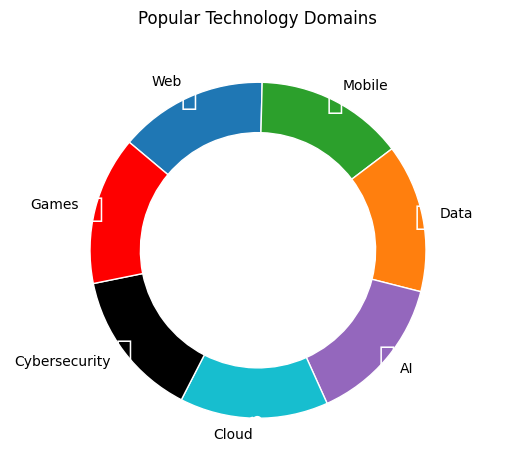

In [43]:
# Define the sections and their corresponding icons
labels = ["Web", "Mobile", "Data", "AI", "Cloud", "Cybersecurity", "Games"]
sizes = [1, 1, 1, 1, 1, 1, 1]  # Equal sizes
colors = ["#1f77b4", "#2ca02c", "#ff7f0e", "#9467bd", "#17becf", "#000000","#fe0000"]  # Blue, Green, Orange, Purple, Teal, Black
icons = ["🌐", "📱", "📈", "🤖", "☁️", "🔒", "🤖"]  # Icons for each category

# Create the wheel chart
fig, ax = plt.subplots()
wedges, texts = ax.pie(sizes,labels = labels, colors=colors, startangle=140, counterclock=False, wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.85)

# Add icons to the center of each slice
for i, (icon, wedge) in enumerate(zip(icons, wedges)):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = np.cos(np.radians(angle))
    y = np.sin(np.radians(angle))
    ax.text(x, y, icon, ha='center', va='center', fontsize=20, color='white')


# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title("Popular Technology Domains", pad=30)
plt.show()


## Data Analysis

> Data analysis is the practice of exploring data and understanding its meaning. 

In [2]:
# define the project and database
PROJECT = os.getenv('GOOGLE_PROJECT_NAME')
DATASET = 'mta_data'

# using the bigquery client library 
client = dw.Client()
# set a reference to the database
dataset_ref = client.dataset(DATASET, project=PROJECT)

# define a run query function
def run_query(sql):
    query = client.query(sql)
    return query.to_dataframe()

# read records from n days ago
from datetime import datetime, timedelta

# set a variable to the current date - n days
last_month = datetime.today() - timedelta(days=90)
date_value = last_month.strftime('%Y-%m-%d')

In [3]:

sql = """
SELECT station_name, booth_name, created_dt, entries, exits
FROM `{}.{}.rpt_turnstile` 
WHERE created_dt >= '{}'
LIMIT 100000
""".format(PROJECT, DATASET, date_value)
df = run_query(sql)
print(sql)



SELECT station_name, booth_name, created_dt, entries, exits
FROM `ozkary-de-101.mta_data.rpt_turnstile` 
WHERE created_dt >= '2024-02-10'
LIMIT 100000



### Use the CSV file if do not have access to a data warehouse

> The file path is defined already in the script

In [4]:
# df = pd.read_csv('./analysis_data.csv', iterator=False)
print(df.head())

# Display basic information about the dataset
df.info()

# Get summary statistics of numeric columns
df.describe()

   station_name booth_name                created_dt  entries     exits
0  ASTORIA BLVD       R514 2024-02-20 03:00:00+00:00  7112558  12965593
1  ASTORIA BLVD       R514 2024-02-20 19:00:00+00:00  7112994  12966073
2  ASTORIA BLVD       R514 2024-02-20 15:00:00+00:00  7112924  12965738
3  ASTORIA BLVD       R514 2024-02-20 23:00:00+00:00  7113012  12966274
4  ASTORIA BLVD       R514 2024-02-20 07:00:00+00:00  7112603  12965603
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   station_name  100000 non-null  object             
 1   booth_name    100000 non-null  object             
 2   created_dt    100000 non-null  datetime64[ns, UTC]
 3   entries       100000 non-null  Int64              
 4   exits         100000 non-null  Int64              
dtypes: Int64(2), datetime64[ns, UTC](1), object(2)
memory usage: 4

,entries,exits
count,100000.0,100000.0
mean,35967847.55507,29023910.22642
std,202634658.343456,182748138.301513
min,0.0,0.0
25%,255560.5,173686.0
50%,1182822.0,874765.0
75%,5294468.0,3640540.25
max,2147110438.0,2120902559.0


## Data Analysis - Profiling

> Data profiling is the process to identify the data types, dimensions, measures, and quantitative values

In [7]:
# get a random sample of data
sample = df.sample(n=100)
sample.head(10)

,station_name,booth_name,created_dt,entries,exits
29184,CORTLANDT ST,A052,2024-02-20 04:00:00+00:00,13671,0
15202,8 ST-NYU,A038,2024-02-20 19:00:00+00:00,452161,174008
82030,JUNIUS ST,R630,2024-02-14 15:00:00+00:00,479157,3012643
91624,ATL AV-BARCLAY,R610,2024-02-14 21:30:00+00:00,7467,0
75087,RIT-ROOSEVELT,TRAM2,2024-02-14 16:00:00+00:00,1957415,49318
48763,1 AV,H007,2024-02-15 23:00:00+00:00,10529946,348461
97711,W 4 ST-WASH SQ,N083,2024-02-14 16:00:00+00:00,1502530,4265685
66569,FORDHAM RD,N218,2024-02-15 15:00:00+00:00,398445,0
2132,111 ST,R530,2024-02-20 23:00:00+00:00,19238242,13074183
52327,23 ST,A031,2024-02-15 07:00:00+00:00,569459,1294536


In [44]:
def is_datetime(df, col, sample_size=10):
  """
  Checks if a column in a DataFrame potentially contains datetime data.

  Args:
      df (pandas.DataFrame): The DataFrame containing the column to analyze.
      col (str): The name of the column to check.
      sample_size (int, optional): The number of rows to use for sample data analysis. Defaults to 10.

  Returns:
      bool: True if the column potentially contains datetime data, False otherwise.
  """

  # Get data type
  data_type = df[col].dtype
  value = False

  if data_type in [object, str]:    
    try:
      # Attempt to convert a sample of the column to datetime
      sample_data = df[col].head(sample_size)
      pd.to_datetime(sample_data) 
      value = True      
    except (pd.errors.ParserError, ValueError):
      # Conversion failed, not likely datetime
      print(f"Parser Error {col} {ValueError}")
  
  return value


def describe_dataframe(df):
  """
  Analyzes a pandas DataFrame and provides a description of columns.

  Args:
      df (pandas.DataFrame): The DataFrame to analyze.

  Returns:
      dict: A dictionary where keys are column names and values are dictionaries
          containing descriptions of 'dimension', 'data_type', 'measure',
          and 'datetime_dimension'.
  """

  # Initialize an empty dictionary to store column descriptions
  column_descriptions = {}

  # Iterate through each column
  for col in df.columns:
    # Get data type
    data_type = df[col].dtype
    print(data_type)
    dimension = None
    datetime_dimension = None  # Not a datetime dimension
    measure = None

    # Analyze potential dimension vs. measure based on data type and heuristics   
    if 'datetime' in data_type.name:
      dimension = True
      datetime_dimension = True  # Not a datetime dimension
    elif data_type in [object, str]:
      # Likely a dimension if it contains words or non-numeric characters
      dimension = any(char.isalpha() for char in col) or not all(char.isdigit() for char in col.split('-'))      
      datetime_dimension = is_datetime(df,col)          
      measure = not dimension
      # print(f'{col} dim: {dimension} or mea: {measure}')      
    else:
      # Numeric data type, potential measure      
      measure = True      

    # Store the description for this column
    column_descriptions[col] = {
        'dimension': dimension,
        'data_type': data_type,
        'measure': measure,
        'datetime_dimension': datetime_dimension
    }

  return column_descriptions

profiling_results = describe_dataframe(sample)
profiling_df = pd.DataFrame.from_dict(profiling_results, orient='index')
profiling_df.head(10)


object
Parser Error station_name <class 'ValueError'>
object
Parser Error booth_name <class 'ValueError'>
datetime64[ns, UTC]
Int64
Int64


/tmp/ipykernel_3670/1588983481.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(sample_data)
/tmp/ipykernel_3670/1588983481.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(sample_data)


,dimension,data_type,measure,datetime_dimension
station_name,True,object,False,False
booth_name,True,object,False,False
created_dt,True,"datetime64[ns, UTC]",None,True
entries,None,Int64,True,None
exits,None,Int64,True,None


# Data Cleaning and Preprocessing
> This is a step that should be done even with trusted data sources. Find bad data, outliers and set the correct data types


In [93]:
# Check for null values in each column
null_counts = df.isnull().sum()
null_counts.head()

# fill null values with a specific value
df = df.fillna(0)

# cast a column to a specific data type
df['created_dt'] = pd.to_datetime(df['created_dt'])

# get the numeric col names and cast them to int
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].astype(int)

# Rename all columns to lowercase
df.columns = [col.lower() for col in df.columns]

### Find outliers

> Outliers are values that are notably different from the other data points in terms of magnitude or distribution

Based on the z-score threshold, this analysis identifies significant deviations from the average for "entries" and "exits" at specific stations. This information can be helpful for further investigation or outlier removal, depending on your needs. Holidays that can cause this.

In [88]:
# measure outliers for entries and exits
# Calculate z-scores within each station group
z_scores = df.groupby('station_name')[numeric_cols] \
        .transform(lambda x: (x - x.mean()) / x.std())

# Set a threshold for outliers
threshold = 3

# Identify outliers based on z-scores within each station
outliers = (z_scores.abs() > threshold)

# Print the count of outliers for each station
outliers_by_station = outliers.groupby(df['station_name']).sum()
print(outliers_by_station)

                 entries  exits
station_name                   
1 AV                  12     12
103 ST                 0     18
103 ST-CORONA          0      0
104 ST                 0      0
110 ST                 0      0
...                  ...    ...
WOODLAWN               0      0
WORLD TRADE CTR       12     12
WTC-CORTLANDT         18     24
YORK ST                0      0
ZEREGA AV              0      0

[378 rows x 2 columns]


## Feature Engineering

In [45]:
# get a list of numeric features
features_numeric = list(df.select_dtypes(include=[np.number]).columns)

# get a list of object features and exclude the target feature 'heartdisease'
features_category = list(df.select_dtypes(include=['object']).columns)

print('Categorical features',features_category)
print('Numerical features',features_numeric)

Categorical features ['station_name', 'booth_name']
Numerical features ['entries', 'exits']


In [60]:
# Derive new features
df['day_of_week'] = df['created_dt'].dt.day_name()
df['hour_of_day'] = df['created_dt'].dt.hour

# Define time window thresholds (adjust based on your data and analysis)
time_slots = {
    'midnight': (0,3),
    'early-morning': (4,7),
    'morning': (8, 11),
    'afternoon': (12, 15),
    'night': (16, 20),
    'late-night': (21, 23)
}

def define_time_window(hour, time_slots):
  """
  This function categorizes a given hour into a time slot based on the provided definitions.

  Args:
      hour (int): The hour of the day (0-23).
      time_slots (dict): A dictionary mapping time slot names to tuples representing start and end hours (inclusive).

  Returns:
      str: The time slot name corresponding to the provided hour.
  """

  for time_slot_name, (start, end) in time_slots.items():
    if start <= hour <= end:
      return time_slot_name
  # Handle cases outside defined time slots (optional)
  raise ValueError(f"Hour {hour} is outside defined time slots")  # Raise an error for unexpected hours

# Create time window feature
df['time_window'] = df['hour_of_day'].apply(define_time_window, time_slots=time_slots)

print(df.head())


   station_name booth_name                created_dt  entries     exits  \
0  ASTORIA BLVD       R514 2024-02-20 03:00:00+00:00  7112558  12965593   
1  ASTORIA BLVD       R514 2024-02-20 19:00:00+00:00  7112994  12966073   
2  ASTORIA BLVD       R514 2024-02-20 15:00:00+00:00  7112924  12965738   
3  ASTORIA BLVD       R514 2024-02-20 23:00:00+00:00  7113012  12966274   
4  ASTORIA BLVD       R514 2024-02-20 07:00:00+00:00  7112603  12965603   

  day_of_week  hour_of_day    time_window  
0     Tuesday            3       midnight  
1     Tuesday           19          night  
2     Tuesday           15      afternoon  
3     Tuesday           23     late-night  
4     Tuesday            7  early-morning  


## Create

In [84]:

# Calculate mean and standard deviation of values grouped by station
def calculate_stats(values, label):
  mean_values = values.mean()
  std_values = values.std()
  low_values = mean_values - std_values
  high_values = mean_values + std_values
  df = pd.DataFrame({ f'low_{label}': [low_values], f'high_{label}': [high_values]})
  return df


# def calculate_stats_per_station(df, label_column, value_column):
#     stats_per_station = {}
#     for station, data in df.groupby(label_column):
#         values = data[value_column]
#         if not values.empty:
#             mean_values = values.mean()
#             std_values = values.std()
#             low_values = mean_values - std_values
#             high_values = mean_values + std_values
#             stats_per_station[station] = {'mean': mean_values, 'std': std_values, 'low': low_values, 'high': high_values}
#     return pd.DataFrame(stats_per_station)

def calculate_stats_per_station(df, label_column, value_column):
    # Group data by station and calculate statistics
    stats_per_station = df.groupby(label_column)[value_column].agg(['mean', 'std'])
    # Calculate low and high values
    low_label = f'low_{value_column}'
    high_label = f'high_{value_column}'
    stats_per_station[low_label] = stats_per_station['mean'] - stats_per_station['std']
    stats_per_station[high_label] = stats_per_station['mean'] + stats_per_station['std']
    # Unstack the DataFrame to move 'low' and 'high' to columns
    stats_per_station = stats_per_station.unstack().swaplevel().unstack()
    return stats_per_station

# # Print the result (unstacking for clarity)
# stats = (df.groupby('station_name')['entries']
#          .apply(calculate_stats, label='entries')
#          .reset_index()).unstack()

stats = calculate_stats_per_station(df, 'station_name', 'entries')

print(stats.info())

# Define a function to categorize foot traffic (using station-specific stats)
def define_foot_traffic(values, low_threshold, high_threshold):
  try:
    if values < low_threshold:
      return 'Low'
    elif values > high_threshold:
      return 'High'
    else:
      return 'Medium'    
  except KeyError:
        # Handle the case when station-specific stats are not available
        # Set default thresholds or return a specific value
    return 'Not Available'

# Create a new column 'foot_traffic'
# df['foot_traffic'] = df.apply(lambda row: define_foot_traffic(row['entries'], 
#                                                              stats.loc[(row['station_name'], 'low_entries')],
#                                                              stats.loc[(row['station_name'], 'high_entries')]), 
#                                axis=1)

# # Print the DataFrame with foot traffic categories
# print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 1 AV to ZEREGA AV
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean          378 non-null    Float64
 1   std           378 non-null    Float64
 2   low_entries   378 non-null    Float64
 3   high_entries  378 non-null    Float64
dtypes: Float64(4)
memory usage: 16.2+ KB
None
